## ADC: Analog/Digital Conversion

Materials are based on [Neural Signal Processing (UCSD COGS118C)](https://github.com/rdgao/COGS118C) by Richard Gao (see the [LICENSE](https://github.com/rdgao/COGS118C/blob/master/LICENSE)).

### Analog signals

Real world signals are continuous in time and amplitude (up to quantum-level limits, anyway). These are referred to as **"analog"** signals (Google it). Soundwaves that we produce when we speak or when we play a violin, for example, are analog signals. 

Equivalently, there are "analog devices" that produce, receive, and/or operate on analog signals. These often involve "analog" circuits.

**Task 1:** Give 3 examples of analog devices.

**Response:** `#_FILL_IN_YOUR_RESPONSE_HERE`

In [ ]:

'''
Sygnal Analogowy: to ciagly sygnal ktory moze przejmowac wartosc w zdefiniowanym przedziale.
Kazdy sygnal analogowy jest opisywany przez funkcje. Sygnaly analogowe sa zmienne w czasie.

Przyklady sygnalow analogowych:

-Sygnaly radiowe
-Nagrania Audio
-Sygnaly telewizyjne
-wzmacniacze audio


Sygnal Cyfrowy: Sygnal ktory prezentuje dane jako ciag dyskretnych wartosci, moze przyjmowac
tylko jedna wartosc ze skonczonego zbioru mozliwych wartosci. Dzieki sygnalom cyfrowym mozemy przedstawiac
wielkosci fizyczne:

-Prad elektryczny albo napiecie
-Faza albo polaryzacja pola elektromagnetycznego
-Cisnienie Akustyczne

Sygnaly Cyfrowe sa wykorzystane w calej elektronice cyfrowej. Wiekszosc podstawowych elementow elektronicznych -rezystory, diody
kondensatory, etc - to elementy z natury analogowe.



# https://www.electronics-tutorials.ws/combination/analogue-to-digital-converter.html - pomocny link




'''



### Digital signals

People used to analyze signals using analog circuits. This is pretty hardcore, and requires extensive hands-on knowledge about circuitry. Once you want to analyze the signal on a "digital" computer, however, you have to "digitize" the signal. This requires an **"analog-to-digital converter"** or ADC for short. 

To digitize an analog signal, you have to discretely sample, both in value (voltage, brightness, etc) and in time. The former is usually called **digitization** or **quantization**, while **sampling** usually refers to the latter. It's like drawing a grid over your continuous signals and interpolating its values only at where the grid crosses.

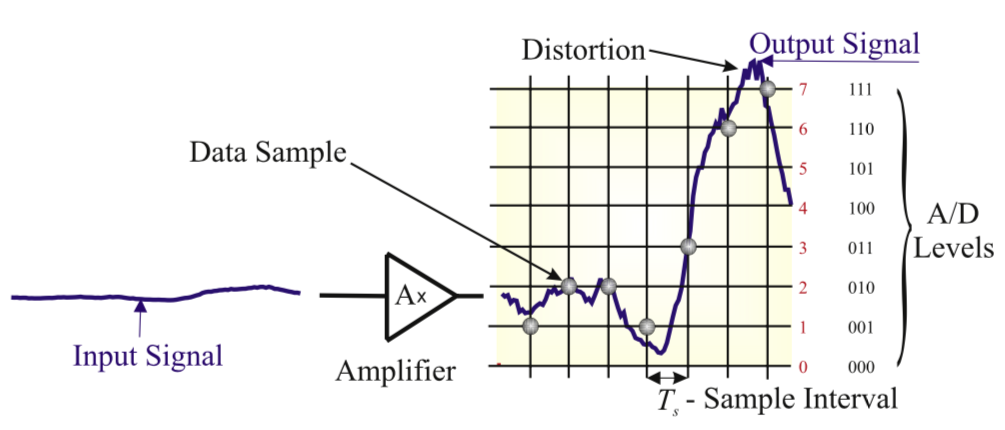


### Digitization

Let's load up some EEG signals and explore the digitization-related issues.

In [ ]:
# necessary imports
import numpy as np
from scipy import io # this submodule will be used to load the signal we want
import bokeh, bokeh.io, bokeh.plotting # for fancy plots
bokeh.io.output_notebook()

In [ ]:
# Download the dataset (to Virtual Machine local filesystem)
# note the leading !. This is a signal to execute the line as a shell command
!wget https://krzysztof.kutt.pl/didactics/psaw/EEG_exp.mat

In [ ]:


# scipy laduje .mat plik do slownika
# szczegoly nie sa wazne, musimy je rozpakowac do zmiennych pythonowskich
EEG_data = io.loadmat('EEG_exp.mat', squeeze_me = True)


In [ ]:
# 
# wypisz wszystkie zmienne ze slownika
print(EEG_data.keys())

# 
# to zawiera dane EEG
EEG = EEG_data['EEG']

# to zawiera czestotliwosc samplowania w Hz (albo sample / sekunda)
# 
fs = EEG_data['fs']
print(f"EEG_data['fs'] = {fs}")

# 
# Wykres sygnalu

bf = bokeh.plotting.figure(
    x_axis_label='Sample Number',  # Labele dla osi
    y_axis_label='Voltage (uV)',
    plot_width=900,
    plot_height=250)
bf.line(np.arange(len(EEG)), EEG)

# 
# Przybliz zeby zobaczyc wiecej szczegolow

bf2 = bokeh.plotting.figure(
    x_axis_label='Sample Number',
    y_axis_label='Voltage (uV)',
    plot_width=900,
    plot_height=250)
# to sa punkty - naszkicuj je jako osobne kropki
# bez laczenia ich.

bf2.scatter(np.arange(1000), EEG[:1000])  # limit to 1000 points

column_plot = bokeh.layouts.column(bf, bf2)
bokeh.plotting.show(column_plot)

**Task 2:** As you can see above, the signal we loaded is already a digitally sampled time series (a little over 70,000 samples), represented by discrete points in the second plot. To study the effect of quantization, let's simulate what would happen if we further quantized the signal, with a (prehistoric) 4-bit ADC:
1. How many possible values can a 4-bit ADC represent? Remember, this means that the ADC has 4 binary 'bits' that it can use, thus giving you a total of how many levels? Compute this number in code and store that value in the variable `num_levels` below.
2. Let's say our ADC has a total range between -32uV to 32uV. What is the voltage resolution of our ADC then? In other words, what is the finest voltage difference our ADC can distinguish between two samples? Compute this number in code and store that value in the variable `delta_v` below.
3. Run the next two cells, they should produce a graph where the orange trace looks very quantized (kind of square). This is not good, because then we cannot distinguish small fluctuations in our signals, which, as we will see later in the course, are very important. **Re-run** the next two cells, but experiment with different values for `num_bits`. Just based on visual inspection of the plot, what is the minimum number of bits that you would want your ADC to have in this case, assuming the blue trace is a faithful representation of your signal? There's no one right answer, but justify your response.

In [ ]:
import math

num_bits = 4
min_v, max_v = -32,32

# 2^n  - 1 , oznacza liczbe wartosci 
# z definicji: . Thus an analogue to digital converter
# takes an unknown continuous analogue signal and converts it into an “n”- bit binary number of 2n bits.

# Voltage_Resolution: ADC Voltage Resolution Formula: (Vmax - Vmin) / (2 ^ n)

num_levels = math.pow(2, num_bits) - 1
delta_v = ( max_v - min_v ) / math.pow(2, num_bits)

In [ ]:


# stworz wektor kwantyzacji, to so nowe mozliwe wartosci, ktore moze miec sygnal
ADC_levels = np.arange(min_v,max_v,delta_v)+delta_v/2

# 
# 
# Skwantuj sygnal EEG naszym ADC dzieki funkcji np.digitalize
# zanotuj ze musimy przeskalowac zdigitalizowany sygnal do jednostek sygnalu
EEG_quant = np.digitize(EEG,bins=ADC_levels)*delta_v+min_v

bf = bokeh.plotting.figure(
    x_axis_label='Sample Number',
    y_axis_label='Voltage (uV)',
    plot_width=900,
    plot_height=250)
bf.line(np.arange(1000), EEG[:1000], legend_label='Original EEG', color='blue')
bf.line(np.arange(1000), EEG_quant[:1000], legend_label='Quantized EEG', color='red')

bokeh.plotting.show(bf)

**Response (for Task 2, point 3):** `#_FILL_IN_YOUR_RESPONSE_HERE`

Zakres: na podstawie artykulu

o efektywnej liczbie bitow: http://cnktechlabs.com/calculators/enob.html



### Sampling

Notice that in all the plots above, the x-axis is "sample number", which simply correponds to the position each value is in the array `EEG`. We want to create a corresponding time vector, which marks at what clock time each value is sampled at. 

Sometimes your data will include a time vector. But for the sake of this exercise, you are asked to create the time vector based on the information/variables you have.

**Task 3:** Sampling in Time  
1. Given the sampling rate, what is the sampling **period**? In other words, how much time elapses between each consecutive sample? Compute this number as a function of `fs` and store it in the variable `dt` below.
2.  How long in total is this signal, in absolute time? Compute and store this in the variable `T_exp` below.
3. Construct the corresponding time vector for the EEG data, assuming that the first sample came at t=0 and evenly spaced samples at `dt`. Store that in the variable `t_EEG` below. Hint: check out the function `np.arange()`.
4. Re-plot the signal as a line chart, but with the x-axis as time (using the time vector you created above), and zoom into the first 1 second of the data. **Take note to label your plots carefully, with units!**
5. To simulate **downsampling** in time, plot every **10th** value of the EEG data by indexing the array (check Google/StackExchange for how to do this). Remember, this applies both to the time vector and your EEG data. **Make sure to label your data and display the legend as Q2 above.**
6. Sometimes it's useful to downsample your signal in time to conserve memory. As we did above, by taking every 10th value in our data, we essentially reduce the data size 10-fold. However, this is **NOT** the entirely right way to downsample your data. What issue do we introduce when we simply do that? (Hint: the answer can be as short as one word, and Google is your friend here if you do not remember from the required reading)

In [ ]:
# Probkowanie, dyskretyzacja - proces tworzenia sygnalu dyskretnego (Sampling)
# Okres probkowania T to czas miedzy pobieraniem kolejnych probek.
# Czestotliwosc probkowania to odwrotnosc okresu probkowania fs = 1 / T



# fs = 1 / T  - z definicji okresu
# T = 1 / fs


'''
Przyklad:
samples = 1:4097;    % 4097 samples
Fs = 200;            % Sampling Frequency (Hz)
t = samples/Fs;      % Time Vector (seconds)

Podobna Sytuacja:
https://dsp.stackexchange.com/questions/29125/how-to-identify-and-differentiate-frequency-and-time-in-eeg-data-using-python

'''

samples=len(EEG)    # liczba sampli = dlugosc frame dla EEG
dt = (1 / fs)
T_exp = samples / fs
t_EEG = np.arange(0,T_exp,dt)

# 
# Wykres sygnalu i jego downsampli
bf = bokeh.plotting.figure(
    x_axis_label="Time [s] ",
    y_axis_label="Voltage (uV) ",
    plot_width=900,
    plot_height=250)
bf.line(t_EEG, EEG,
        legend_label='Original EEG', color='blue')
bf.line(t_EEG[::10], EEG[::10],         #co dziesiaty sampel
        legend_label='Downsampled EEG', color='red')
bf.x_range = bokeh.models.Range1d(0, 1)

bokeh.plotting.show(bf)

**Response (for Task 3, point 6):** `#_FILL_IN_YOUR_RESPONSE_HERE` 

In [ ]:
# Decymacja sygnalu bez wiedzy o jego naturze naraza nas na powstanie sygnalu o nieznanych wlasnosciach.
# Znaczne obnizenie czestotliwosci wiaze sie z ryzykiem powstania aliasingu. 


# Na podstawie definicji:
# Aliasing – nieodwracalne zniekształcenie sygnału w procesie próbkowania wynikające z niespełnienia założeń twierdzenia o próbkowaniu. 
# Zniekształcenie objawia się obecnością w wynikowym sygnale składowych o błędnych częstotliwościach (aliasów).
#
